In [1]:
import pandas as pd
import re


In [2]:
## Analysis of Activity and type of attacks in the state of florida.

In [3]:
pd.options.display.max_columns = None

In [4]:
df= pd.read_csv('C:/Users/Lucas Angulski/Documents/GitHub/Ironhack-DA/project 1/attacks.csv', encoding='latin1')

In [5]:
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [6]:
#checking the shape of the data 
print(f'\033[95m {df.shape}\n')
##this means that we have 24 types of data and over 25k  entries##



#checking the size of the data
print(f'\033[0m \n {df.size}')
## The data have over 61k elements

 (25723, 24)

 
 617352


In [7]:
df.info()

## the last two columns have no relevant information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [8]:
df.dtypes


Case Number                object
Date                       object
Year                      float64
Type                       object
Country                    object
Area                       object
Location                   object
Activity                   object
Name                       object
Sex                        object
Age                        object
Injury                     object
Fatal (Y/N)                object
Time                       object
Species                    object
Investigator or Source     object
pdf                        object
href formula               object
href                       object
Case Number.1              object
Case Number.2              object
original order            float64
Unnamed: 22                object
Unnamed: 23                object
dtype: object

In [9]:
##we can use .drop_duplicates() to eliminate duplicated values

#lets start cleaning the data:

bef = len(df)
print(bef)
df = df.drop_duplicates()

aft= len(df)
print(aft)

print(f'Number of duplicated records removed {bef-aft}')

25723
6312
Number of duplicated records removed 19411


In [10]:
df.Year.unique()

array([2018., 2017.,   nan, 2016., 2015., 2014., 2013., 2012., 2011.,
       2010., 2009., 2008., 2007., 2006., 2005., 2004., 2003., 2002.,
       2001., 2000., 1999., 1998., 1997., 1996., 1995., 1984., 1994.,
       1993., 1992., 1991., 1990., 1989., 1969., 1988., 1987., 1986.,
       1985., 1983., 1982., 1981., 1980., 1979., 1978., 1977., 1976.,
       1975., 1974., 1973., 1972., 1971., 1970., 1968., 1967., 1966.,
       1965., 1964., 1963., 1962., 1961., 1960., 1959., 1958., 1957.,
       1956., 1955., 1954., 1953., 1952., 1951., 1950., 1949., 1948.,
       1848., 1947., 1946., 1945., 1944., 1943., 1942., 1941., 1940.,
       1939., 1938., 1937., 1936., 1935., 1934., 1933., 1932., 1931.,
       1930., 1929., 1928., 1927., 1926., 1925., 1924., 1923., 1922.,
       1921., 1920., 1919., 1918., 1917., 1916., 1915., 1914., 1913.,
       1912., 1911., 1910., 1909., 1908., 1907., 1906., 1905., 1904.,
       1903., 1902., 1901., 1900., 1899., 1898., 1897., 1896., 1895.,
       1894., 1893.,

In [11]:
df = df[df['Year']>500].sort_values(by=['Year'])

In [12]:
df.Year.unique()

array([1543., 1554., 1555., 1580., 1595., 1617., 1637., 1638., 1642.,
       1700., 1703., 1721., 1723., 1733., 1738., 1742., 1748., 1749.,
       1751., 1753., 1755., 1758., 1764., 1767., 1771., 1776., 1779.,
       1780., 1783., 1784., 1785., 1786., 1787., 1788., 1791., 1792.,
       1797., 1800., 1801., 1802., 1803., 1804., 1805., 1807., 1808.,
       1810., 1811., 1812., 1815., 1816., 1817., 1818., 1819., 1822.,
       1823., 1825., 1826., 1827., 1828., 1829., 1830., 1831., 1832.,
       1834., 1835., 1836., 1837., 1839., 1840., 1841., 1842., 1844.,
       1845., 1846., 1847., 1848., 1849., 1850., 1851., 1852., 1853.,
       1855., 1856., 1857., 1858., 1859., 1860., 1861., 1862., 1863.,
       1864., 1865., 1866., 1867., 1868., 1869., 1870., 1871., 1872.,
       1873., 1874., 1875., 1876., 1877., 1878., 1879., 1880., 1881.,
       1882., 1883., 1884., 1885., 1886., 1887., 1888., 1889., 1890.,
       1891., 1892., 1893., 1894., 1895., 1896., 1897., 1898., 1899.,
       1900., 1901.,

In [13]:
df=df[(df['Country']=='USA')]

In [14]:
df

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
6168,1642.00.00,1642,1642.0,Unprovoked,USA,New York,Between Manhattan and The Bronx,Swimming,Antony Van Corlear,M,NaN,FATAL,Y,NaN,NaN,"Knickerbocker's History of New York, by Washin...",1642.00.00-Corlear.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1642.00.00,1642.00.00,135.0,NaN,NaN
6151,1751.07.27,27-Jul-1751,1751.0,Unprovoked,USA,Massachusetts,NaN,Swimming,male,M,NaN,FATAL,Y,NaN,NaN,"Pennsylvania Gazette, 8/15/1751",1751.07.27-Massachusetts.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1751.07.27,1751.07.27,152.0,NaN,NaN
6146,1771.07.12.R,Reported 12-Jul-1771,1771.0,Unprovoked,USA,NaN,Damiscotte,Fishing,male,M,NaN,FATAL,Y,NaN,NaN,"C. Moore, GSAF",1771.07.12.R-Damiscotte.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1771.07.12.R,1771.07.12.R,157.0,NaN,NaN
6143,1779.00.00,1779,1779.0,Unprovoked,USA,Hawaii,"Maliu, Hawai'i",Surfing,Nu'u-anu-pa'a hu,M,young,"FATAL, buttock lacerated",Y,NaN,NaN,"G.H. Balazs; J. Borg, p.68; L. Taylor (1993), ...",1779.00.00-Hawaii.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1779.00.00,1779.00.00,160.0,NaN,NaN
6142,1780.08.08,08-Aug-1780,1780.0,Unprovoked,USA,Florida,"Pensacola Harbor, Escambia County",Swimming,Joseph Feron,M,NaN,FATAL,Y,NaN,NaN,"C.Moore, GSAF",1780.08.08-Feron.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1780.08.08,1780.08.08,161.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
12,2018.05.13.b,13-May-2018,2018.0,Unprovoked,USA,South Carolina,"Hilton Head Island, Beaufort County",Swimming,Jei Turrell,M,10,Severe bite to right forearm,N,15h00,NaN,"C. Creswell, GSAF & K. McMurray TrackingSharks...",2018.05.13.b-Turrell.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.13.b,2018.05.13.b,6291.0,NaN,NaN
25,2018.04.19,19-Apr-2018,2018.0,Unprovoked,USA,Hawaii,"Shipwrecks Beach, Keoneloa Bay, Kauai",Body boarding,Dylan McWilliams,M,29,Lacerations to right lower leg,N,NaN,6' shark,"The Garden Island, 4/19/2018",2018.04.19-McWilliams.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.19,2018.04.19,6278.0,NaN,NaN
35,2018.03.31,31-Mar-2018,2018.0,Unprovoked,USA,Hawaii,Kukio Beach,Stand-Up Paddleboarding,male,M,25,Injuries to right leg & hand,N,09h30,"Tiger shark, 12'","Khon2, 3/31/2018",2018.03.31-Hawaii.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.03.31,2018.03.31,6268.0,NaN,NaN


In [15]:
df.Area.unique()

array(['New York ', 'Massachusetts', nan, 'Hawaii', 'Florida',
       'South Carolina', 'New York', 'Rhode Island', 'New Jersey', 'CUBA',
       'Maryland', 'California', 'Virginia', 'North Carolina', 'Texas',
       'Alabama', 'Georgia', 'Connecticut', 'Mississippi', 'East coast',
       ' New Jersey', 'Delaware', 'Louisiana', 'Puerto Rico',
       'Midway Atoll', ' North Carolina', 'US Virgin Islands',
       'Wake Island', 'Illinois', 'Pennsylvania', 'Oregon', 'Florida ',
       'North & South Carolina', 'Washington', 'North Carolina ',
       'Missouri', 'Alaska', 'Johnston Atoll', 'South Carolina ',
       'New Mexico', 'Kentucky', 'Guam', 'Maine', 'Palmyra Atoll'],
      dtype=object)

In [16]:
## removing white spaces from the words

In [17]:

df['Area'] = df['Area'].str.strip()

In [18]:
df.Area.unique()

##since we are going to focus in the state of florida only, we will leave the other states as is.

array(['New York', 'Massachusetts', nan, 'Hawaii', 'Florida',
       'South Carolina', 'Rhode Island', 'New Jersey', 'CUBA', 'Maryland',
       'California', 'Virginia', 'North Carolina', 'Texas', 'Alabama',
       'Georgia', 'Connecticut', 'Mississippi', 'East coast', 'Delaware',
       'Louisiana', 'Puerto Rico', 'Midway Atoll', 'US Virgin Islands',
       'Wake Island', 'Illinois', 'Pennsylvania', 'Oregon',
       'North & South Carolina', 'Washington', 'Missouri', 'Alaska',
       'Johnston Atoll', 'New Mexico', 'Kentucky', 'Guam', 'Maine',
       'Palmyra Atoll'], dtype=object)

In [19]:
df=df[(df['Area']=='Florida')]


In [20]:
df = df.rename(columns={'Area':'State'})
df = df.rename(columns={'Fatal (Y/N)':'Fatal'})

In [21]:
df.Type.unique()

array(['Unprovoked', 'Invalid', 'Provoked', 'Boating', 'Sea Disaster',
       'Boat'], dtype=object)

In [22]:
df['Fatal'] = df['Fatal'].str.strip()

In [23]:
df.Fatal.unique()

array(['Y', nan, 'N', 'UNKNOWN'], dtype=object)

In [24]:
# cleaning fatal 

def clean_Fatal(row):
    if row == 'Y':
        return 'Yes'
    elif row == 'UNKNOWN':
        return ''
    else:
        return 'No'

In [25]:
df.Fatal = df.Fatal.map(clean_Fatal)

In [26]:
df.Fatal.value_counts()

No     977
Yes     46
         7
Name: Fatal, dtype: int64

In [27]:
df.Location.unique()

array(['Pensacola Harbor, Escambia County',
       'Pensacola Bay, Escambia County', 'Pensacola, Escambia County',
       'Near Fernandina Bar, Nassau County ', 'Cape Sable, Monroe County',
       'Hutchinson Island, Martin County',
       'In the bay near the naval yard at Pensacola, Escambia County',
       'Fort Pickens, Escambia County',
       'Between Lake Worth & Biscayne Bay, near Hillsboro',
       'Fernandina, Nassau County', 'Hillsborough Bay',
       'North Beach, St. Augustine', 'Anastasia Island',
       'Jacksonville, Duval County', nan,
       'a creek near Jacksonville, Duval County',
       'Trout River, Panama Park',
       'Near a small wreck in a channel at Indian Key',
       "St. John's River", 'Indian River Inlet / Fort Pierce Inlet',
       'Fort Pierce, St Lucie County',
       'Pablo Beach, Jacksonville, Duval County',
       'Garden Key, Charlotte County', ' Marathon, Monroe County',
       '16 miles north of Fort Pierce Inlet, Indian River County ',
       

In [28]:
df.Year.value_counts()

2003.0    45
2007.0    39
2001.0    38
2008.0    37
2000.0    35
          ..
1947.0     1
1948.0     1
1954.0     1
1973.0     1
1780.0     1
Name: Year, Length: 110, dtype: int64

In [29]:
# todrop = df[df["Type"]== 'Invalid']

# df = df.drop(todrop.index)

In [30]:
len(df[df["Activity"]== 'snorkeling'])

0

In [31]:
df['Activity'] = df['Activity'].astype(str).str.lower()

In [32]:
df.Activity.unique()

array(['swimming', 'fell overboard', 'seine netting', 'bathing',
       'attempting to rescue woman seized by shark', 'knocked overboard',
       'nan',
       'during "an exhibition" he was tied in sack & thrown overboard ',
       'crossing inlet in a boat, seen fighting sharks with his oar, sharks smashed boat',
       'fishing', 'swimming / floating on his back',
       'swimming ashore from a "filibuster"', 'hunting crayfish',
       'rowing',
       'fishing,  tarpon being chased by shark  leapt across his skiff, breaking it in half & larkin became tangled in the net',
       'fell overboard from fishing schooner halycon',
       'fell overboard & swimming', 'fishing for mackerel',
       'fishing, attempted to take a netted shark', 'diving',
       'knocked into the water', 'swimming ', 'floating',
       'removing shark from a net', 'jumped overboard and swimming',
       'hardhat diving ', 'sponge diving', 'crabbing', 'standing',
       'treading water after survivng crash of 

In [33]:
df.Activity.value_counts()

surfing                                                        366
swimming                                                       138
wading                                                          67
nan                                                             63
fishing                                                         33
                                                              ... 
playing with a frisbee in the shallows                           1
clamming                                                         1
adrift after the sinking of the motor yacht princess dianne      1
floating on a small orange raft                                  1
feeding sharks                                                   1
Name: Activity, Length: 195, dtype: int64

## cleaning Activities:

<img src="https://i.pinimg.com/originals/00/a7/fe/00a7fe30e8db16d49a46b7cb55ec799d.png" width="500" align="center">










### intro

lets define the activities into fewer categories. The column  
has many items described not only as a single activity, We will
try to divide into sub-categories for better understanding of the attacks.

In order to divide into these categories we will look up for the most 

below we will find key words using the famous <b>REGEX </b>.

swimming = swimming / swim

walk = /Wading /  Walking 

Surfing = surfing  or boogie boarding /surfng 

sailing = boating /canoeing / sailing /raft / Kayak /floating

ep_boats = ship/yacht  (engined powered)

Kite/kiting = kitesurfing/ kite boarding/ Skimboarding

fishing = Spearfishing / fishing /net

jet/skiing =  jetskiing /skiing / water-skiing

feeding sharks =  feeding sharks

dive = scuba diving / scuba / dive / Snorkeling

taking photos = photos / photo shooting

other




In [34]:
# activity is defined as object, in order to use regex we need to convert it into STR.

#  REGEX HELPER : https://regexr.com/

# df['Activity'] = df['Activity'].astype(str).str.lower()

In [35]:
#https://www.geeksforgeeks.org/extract-punctuation-from-the-specified-column-of-dataframe-using-regex/#:~:text=re.findall%20%28%29%20function%20is%20used%20to%20extract%20all,pattern%20in%20string%2C%20as%20a%20list%20of%20strings.
def activity_Cleaner(row):
    #[SsWw][AaWw][DdIilL][/IikKmM][iIMmNn/][g]*
    #swimming = swimming / swim / jump 
    swimming_list = re.findall('[sj][wu][im][pm][m]?\w*',row['Activity'])
    #walk = /Wading /  Walking / 
    walking_list = re.findall('[w][a][dl][k]?\w*',row['Activity'])
    #Surfing = surfing  or boogie boarding /surfng / body surfing
    surfing_list = re.findall('[sb][ou][dor][ygf][i][e]?\w*',row['Activity'])
    #sailing = boating /canoeing / sailing /raft / floating
    sailing_list = re.findall('[bcsrkf][aol][anifyo][atol][teki]?\w*',row['Activity'])
    #ep_boats = ship/yacht  (engined powered)
    ep_boats_list =  re.findall('[sy][ha][ic][hp][t]?\w*',row['Activity'])
    #Kite/kiting = kitesurfing/ kite boarding/ Skimboarding
    kite_list =  re.findall('[k][i][t][ie][n]?\w*',row['Activity'])
    #fishing = Spearfishing / fishing /net
    fish_list = re.findall('[fn][ie][st][h]?\w*',row['Activity'])
    #jet/skiing =  jetskiing /skiing / water-skiing
    jet_list = re.findall('[s][k][i][i][n]\w*',row['Activity'])
    #dive = scuba diving / scuba / dive / Snorkeling
    dive_list = re.findall('[ds][inc][vuo][eibr][ak]?\w*',row['Activity'])
    #feeding sharks =  feeding sharks
    feed_list = re.findall('[f][e][e][d]\w*',row['Activity'])
    #taking photos = photos / photo shooting
    photo_list = re.findall('[p][h][o][t][o]\w*',row['Activity'])
    
    ## reading a list where it will store each time the word appears in each row, if its different,
    ##it changes the value of the row 
    ## to what the 'return' has been set.
    
    if len(swimming_list) !=0:
        return 'swimming'
    elif len(walking_list) !=0:
        return 'walking'
    
    elif len(surfing_list) !=0:
        return 'surfing'
    
    elif len(sailing_list) !=0:
        return 'sailing'
    
    elif len(ep_boats_list) !=0:
        return 'ep_boats'
    
    elif len(kite_list) !=0:
        return 'kiting'
    
    elif len(kite_list) !=0:
        return 'kiting'
    
    elif len(fish_list) !=0:
        return 'fishing'
    
    elif len(jet_list) !=0:
        return 'skiing'
    
    elif len(dive_list) !=0:
        return 'diving'
    
    elif len(feed_list) !=0:
        return 'feeding'
    
    elif len(photo_list) !=0:
        return 'Photoshooting'

    else:
        return  'other'
    
    

In [36]:
df['Activityfix'] = df.apply(activity_Cleaner, axis = 1)



In [37]:
df['Activityfix'].value_counts()

surfing          414
swimming         170
other            161
walking          100
fishing           94
diving            53
sailing           27
skiing             4
Photoshooting      3
ep_boats           2
kiting             1
feeding            1
Name: Activityfix, dtype: int64

In [74]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

<Figure size 1332x756 with 0 Axes>

In [43]:
df['Activity'] = df['Activity'].map(type)
data = df['Activityfix'].value_counts()


#### As we can see down below the percentage of people being attacked by feeding a shark in Florida is no relevant at all.

<img src="https://i.imgflip.com/p5d1n.jpg" width="300" align="center">

So it is safe to say that the costumers are not going to become shark's meal ;)

(-1.1183510325948822,
 1.1056228712060279,
 -1.1127860002657934,
 1.100608857155514)

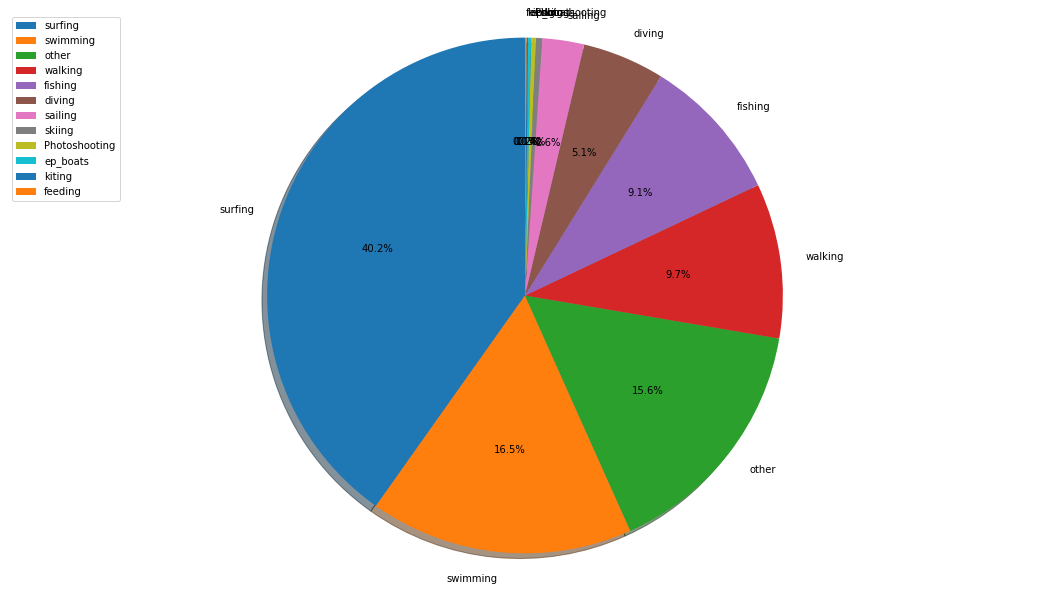

In [89]:
fig1, ax1 = plt.subplots()  
fig1 = plt.gcf()
fig1.set_size_inches(18.5, 10.5)
ax1.pie(data, labels=data.index, autopct="%1.1f%%", shadow=True, startangle=90)
plt.legend(data.index, loc='upper left')
ax1.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.

In [40]:
df

,Case Number,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23,Activityfix
6142,1780.08.08,08-Aug-1780,1780.0,Unprovoked,USA,Florida,"Pensacola Harbor, Escambia County",<class 'str'>,Joseph Feron,M,NaN,FATAL,Yes,NaN,NaN,"C.Moore, GSAF",1780.08.08-Feron.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1780.08.08,1780.08.08,161.0,NaN,NaN,swimming
6055,1845.07.31.R,Reported 31-Jul-1845,1845.0,Unprovoked,USA,Florida,"Pensacola Bay, Escambia County",<class 'str'>,a sailor from the U.S.S. Falmouth,M,NaN,FATAL,Yes,NaN,NaN,"Times-Picayune, 7/31/1845",1845.07.31.R-sailor.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1845.07.31.R,1845.07.31.R,248.0,NaN,NaN,other
6054,1845.09.10.R,Reported 10-Sep-1845,1845.0,Unprovoked,USA,Florida,"Pensacola Bay, Escambia County",<class 'str'>,Nickerson,M,NaN,FATAL,Yes,NaN,NaN,"Tioga Eagle, 9/10/1845",1845.09.10.R-Nickerson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1845.09.10.R,1845.09.10.R,249.0,NaN,NaN,fishing
6034,1849.06.08.a,08-Jun-1849,1849.0,Unprovoked,USA,Florida,"Pensacola, Escambia County",<class 'str'>,Mrs. Cracton,F,NaN,FATAL,Yes,NaN,NaN,"Adams Sentinel, 8/6/1849",1849.06.08.a-Cracton.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1849.06.08.a,1849.06.08.a,269.0,NaN,NaN,other
6033,1849.06.08.b,08-Jun-1849,1849.0,Unprovoked,USA,Florida,"Pensacola, Escambia County",<class 'str'>,Mr. Mansfield,M,NaN,FATAL,Yes,NaN,NaN,"Adams Sentinel, 8/6/1849",1849.06.08.b-Mansfield.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1849.06.08.b,1849.06.08.b,270.0,NaN,NaN,diving
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,2017.04.26,26-Apr-2017,2017.0,Invalid,USA,Florida,NaN,<class 'str'>,Molly Cavelli,F,NaN,Alleged laceration to left ankle,No,NaN,No shark invovlement - it ws a publicity stunt,"The Sun, 5/6/2017",2017.05.26-Cavelli.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.04.26,2017.04.26,6152.0,NaN,NaN,Photoshooting
140,2017.05.28,28-May-2017,2017.0,Unprovoked,USA,Florida,Off Jupiter,<class 'str'>,Randy Jordan,M,NaN,Lacerations to right arm,No,Morning,Tiger shark,"M. Michaelson, GSAF",2017.05.28-Jordan.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.05.28,2017.05.28,6163.0,NaN,NaN,feeding
9,2018.05.26.a,26-May-2018,2018.0,Unprovoked,USA,Florida,"Daytona Beach, Volusia County",<class 'str'>,male,M,12,Minor injury to foot,No,14h00,NaN,"K. McMurray, Tracking Sharks.com",2018.05.26.a-DaytonaBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.a,2018.05.26.a,6294.0,NaN,NaN,other
8,2018.05.26.b,26-May-2018,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",<class 'str'>,Cody High,M,15,Lower left leg bitten,No,17h00,"Bull shark, 6'","K.McMurray, TrackingSharks.com",2018.05.26.b-High.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.b,2018.05.26.b,6295.0,NaN,NaN,walking
